In [16]:
import time
import pandas as pa
import numpy as np
import seaborn as sb
import matplotlib.pyplot as pyp
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import plot_roc_curve, roc_curve, accuracy_score
import warnings
    
warnings.filterwarnings('ignore')

titanic_cols = [ 'ID', 'Sobrevivente', 'Classe', 'Nome','Sexo', 'Idade', 'EsposasEIrmÃ£s', 'Parentes', 
    'Passagem', 'Tarifa', 'Cabine', 'Embarque' ]

titanic_df_orig = pa.read_csv('train.csv', names=titanic_cols, header=0)

titanic_df = titanic_df_orig.copy()
titanic_df['Sexo'] = titanic_df['Sexo'].map({'female': 1, 'male': 0})
titanic_df['Embarque'] = titanic_df['Embarque'].map({'S': 0, 'C': 1,'Q': 2})
pa.set_option('display.max_rows', 10)
titanic_df = titanic_df.copy()

def index_of_dic(dic, key):
    return dic[key]

def StrList_to_UniqueIndexList(lista):
    group = set(lista)

    dic = {}
    i = 0
    for g in group:
        if g not in dic:
            dic[g] = i
            i += 1

    return [index_of_dic(dic, p) for p in lista]

titanic_df['Passagem'] = StrList_to_UniqueIndexList(titanic_df['Passagem'])
titanic_df['Cabine'] = StrList_to_UniqueIndexList(titanic_df['Cabine'])

conj_completo = titanic_df.copy()
conj_modelo = titanic_df.drop(labels=['ID', 'Nome'], axis=1)

idade_media = conj_modelo['Idade'].mean()
idade_std = conj_modelo['Idade'].std()
idade_null = len(conj_modelo[conj_modelo['Idade'].isnull()])
random_idades = np.random.randint(idade_media - idade_std, idade_media + idade_std, idade_null, dtype='int')
conj_modelo.loc[conj_modelo['Idade'].isnull(), 'Idade'] = random_idades
conj_modelo.fillna(0, inplace=True)

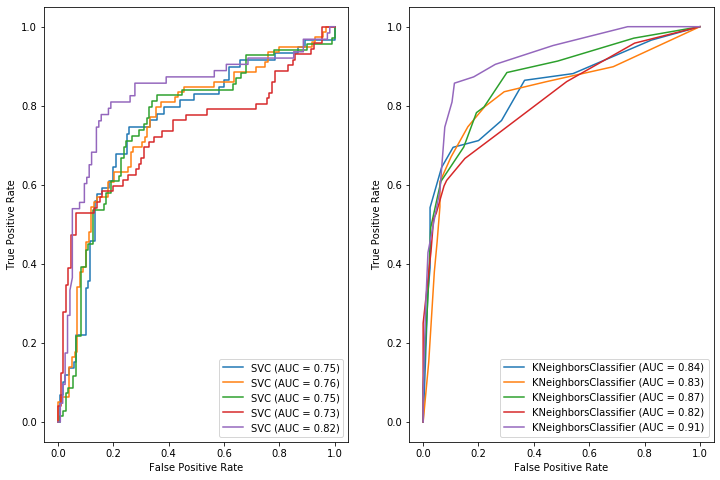

In [27]:
fig, axes = pyp.subplots(1,2, figsize=(12,8))

X = conj_modelo.drop(labels=['Sobrevivente'], axis=1).values
y = conj_modelo['Sobrevivente'].values


kf = KFold(n_splits=5, random_state=200)
for treino_i, teste_i in kf.split(X):
    X_treino, X_teste = X[treino_i], X[teste_i]
    y_treino, y_teste = y[treino_i], y[teste_i]
    svmp = svm.SVC(kernel='rbf', C=1000, gamma=1e-4, probability=True, max_iter=10000000).fit(X_treino,y_treino)
    plot_roc_curve(svmp, X_teste, y_teste, ax=axes[0])
    kmp = KNeighborsClassifier(algorithm='brute', metric='mahalanobis', n_neighbors=11).fit(X_treino,y_treino)
    plot_roc_curve(kmp, X_teste, y_teste, ax=axes[1])